In [13]:
import qiskit

In [14]:
from matplotlib import pyplot as plt
import numpy as np
from qiskit.ml.datasets import ad_hoc_data
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

In [15]:
feature_dim = 2
training_dataset_size = 20
testing_dataset_size = 10
random_seed = 10589
shot = 10000

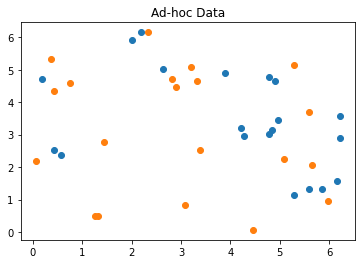

In [16]:
samaple_total, training_input, test_input, class_labels = ad_hoc_data(training_size=training_dataset_size, 
                                                                      test_size=testing_dataset_size,
                                                                      gap=0.3, 
                                                                      n=feature_dim, 
                                                                      plot_data=True)

In [17]:
datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

{'A': 0, 'B': 1}


In [19]:
backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dim, reps=2)
svm = QSVM(feature_map, training_input, test_input, None)
svm.random_seed = random_seed
quantum_instance = QuantumInstance(backend, shots=shot, seed_simulator=random_seed, seed_transpiler=random_seed)
result = svm.run(quantum_instance)

C:\Users\amaur\.conda\envs\qiskit\lib\site-packages\qiskit\circuit\register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not isinstance(key, (int, np.int, np.int32, np.int64, slice, list)):
C:\Users\amaur\.conda\envs\qiskit\lib\site-packages\qiskit\circuit\register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the pre

C:\Users\amaur\.conda\envs\qiskit\lib\site-packages\qiskit\aqua\algorithms\classifiers\qsvm\_qsvm_binary.py:81: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = labels.astype(np.float)
C:\Users\amaur\.conda\envs\qiskit\lib\site-packages\qiskit\circuit\register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20;

Kernel matrix during the training


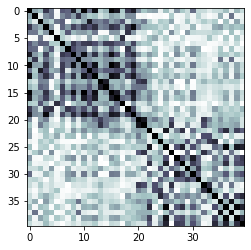

In [7]:
print('Kernel matrix during the training')
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix), interpolation='nearest', origin='upper', cmap='bone_r')
plt.show()

In [9]:
predicted_labels = svm.predict(datapoints[0])
predicted_classes = map_label_to_class_name(predicted_labels, svm.label_to_class)

C:\Users\amaur\.conda\envs\qiskit\lib\site-packages\qiskit\circuit\register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not isinstance(key, (int, np.int, np.int32, np.int64, slice, list)):
C:\Users\amaur\.conda\envs\qiskit\lib\site-packages\qiskit\circuit\register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the pre

In [11]:
print('Ground truth: {}'.format(datapoints[1]))
print('Prediction:   {}'.format(predicted_labels))
print('Testing success ratio: ', result['testing_accuracy'])

Ground truth: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Prediction:   [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Testing success ratio:  1.0
